### Data dictionary 

| Column Name | Description|
|-------------|------------|
| name| Name of the Game|
| platform | Game Platform|
| year_of_release| Year Game Released|
| genre | Type of Game|
| publisher| Name of Game Publisher|
| na_sales| North American Sales|
| eu_sales| European Sales|
| jp_sales | Japanese Sales|
| other_sales| Sales from Other Countries Not including N-America, Europe, and Japan |
| global_sales| Global Sales|
| critic_score| Critics Rating of the Game|
| critic_count| Number of Critics who rated the game|
| user_score| Users Rating of the Game|
| user_count| Number of Users who rated the game|
| developer| Developer Name|
| rating| Appropriate User Age Rating|


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from numpy import median, mean

import warnings
warnings.filterwarnings("ignore")

###### library version used

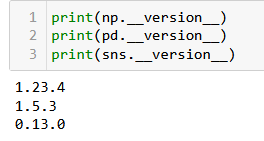

In [3]:
df = pd.read_csv("vgsales.csv")

# Data overview

Provided dataset contains historical records of the retail company, selling video games on various platforms globally.

The dataset contains 16 features and 16719 observations. To avoid bias missing data which exceeds 10% should be removed (Madley-Dowd, 2019), such as features: critic score, critic count, user score, user count, rating or developer.

The majority of features required to answer main business questions have less than 10% or no missing data, however developers feature contains 6623 NaN values out of 16719 which makes it 39.6% of missing values.

In [4]:
df

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.duplicated().sum()

0

In [6]:
# null values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


### Missing values

The majority of features required to answer main business questions have less than 10% or no missing data, however developers feature contains 6623 NaN values out of 16719 which makes it 39.6% of missing data points. 

In [7]:
df.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

To handle missing values, it could be used various statistical methods, such as filling *NaNs* with the most frequent value (mode) or creation of new category instead, such as “unknown” (Goyal, 2023). 

However, as can be seen in the bar chart below, due to a significant number of missing data points, the overall distribution of the new category (*unknown*) would overcount the value in comparison with other developers therefore instead of removing or filling NaN values, the feature when used for visualization purposes will be treated as data sample which would provide meaningful insights. The visualisation using the Seaborn library, when performed, would simply avoid observations automatically where missing values are present.

In [8]:
devs_fillnans = df["Developer"].fillna("Unknown")

In [9]:
df["Developer"].value_counts()

Ubisoft                                   204
EA Sports                                 172
EA Canada                                 167
Konami                                    162
Capcom                                    139
                                         ... 
Genki, Kojima Productions                   1
Warner Bros. Interactive Entertainment      1
THQ, Altron                                 1
Netherock Ltd.                              1
Interchannel-Holon                          1
Name: Developer, Length: 1696, dtype: int64

In [10]:
devs_nonull = devs_fillnans.value_counts()

In [11]:
devs_nonull_count = devs_nonull[devs_nonull>= 100]

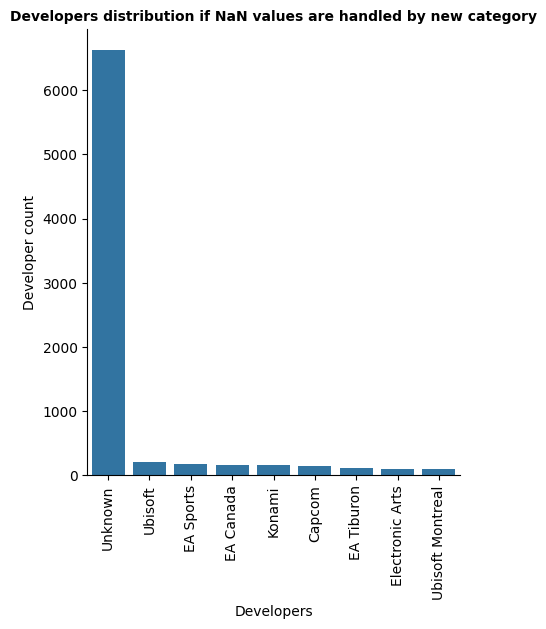

In [12]:
sns.catplot(devs_nonull_count, kind="bar");
plt.xticks(rotation=90);
plt.title("Developers distribution if NaN values are handled by new category",fontweight="bold", fontsize = 10);
plt.ylabel("Developer count");
plt.xlabel("Developers");

---

# Business questions

### Top 5 games by global sales

In order to visualize the top five games by global sales, the data set has been filtered by required features - which in this particular task are game name and global sales, by using the loc method and by sorting values by global sales feature with descending order, including head to-return only top five values instead of all available in the dataset.

In order to provide a meaningful visual aspect of the proportions, two common visualisations were used which are bar chart following by pie chart (McQuaid, 2024).

In [13]:
df_sales = df.loc[:,["Name","Global_Sales"]].sort_values(by="Global_Sales", ascending=False).head(5)
df_sales

,Name,Global_Sales
0,Wii Sports,82.53
1,Super Mario Bros.,40.24
2,Mario Kart Wii,35.52
3,Wii Sports Resort,32.77
4,Pokemon Red/Pokemon Blue,31.37


##### Top five games horizontal bar chart

The *categorical bar chart with horizontal orientation* below provides an overview of proportions and a clear comparison between the top five selling games globally. It can be seen that **Wii Sports** is the highest performer in terms of global sales and reached over twice higher sales than **Super Mario Bros**, which gained second place in terms of global sales.

The chart includes a grid on a white background for easier sales value evaluation. To keep visual harmony, a muted palette was chosen that also diversifies bars between each other making the chart easy to read. Blue head title and axis titles match with the highest performer.

##### Insights

**<center>Top five games per global sales are as follows:</center>** 


|Game| Sales|
|----|------|
|Wii Sports| 82.53|
|Super Mario Bros| 40.24|
|Mario Kart Wii| 35.52|
|Wii Sports Resort| 32.77|
|Pokemon Red / Pokemon Blue| 31.37|


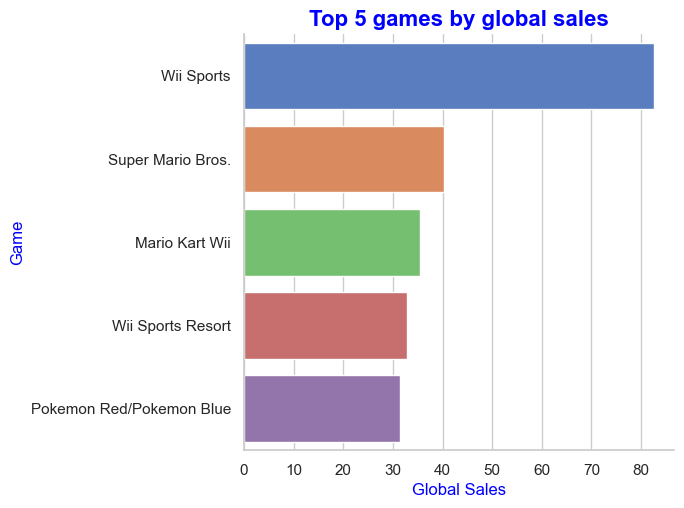

In [14]:
sns.set(style="whitegrid")

sns.catplot(data=df_sales, x="Global_Sales", y="Name", kind="bar", palette="muted", legend=None, aspect=1.4);
plt.ylabel("Game", color="blue");
plt.xlabel("Global Sales", color="blue");
plt.title("Top 5 games by global sales",fontweight="bold", color="blue", fontsize=16);

##### Top five games pie chart overview and insights

As addition to the chart above, the *pie chart* provides a percentage proportions overview and comparison between the top five game performers in terms of global sales, showing that across five best-selling games the **Wii Sports** itself generates **37.1%** of income.

The chart was slightly twisted, so the main performer was on the left side, with the rest of the games on the right side, providing a clear comparison as the bar chart addition.
The title has been made with a matching top pie peace colour to not overtake the attention from the chart itself and to be more visible than the default black.

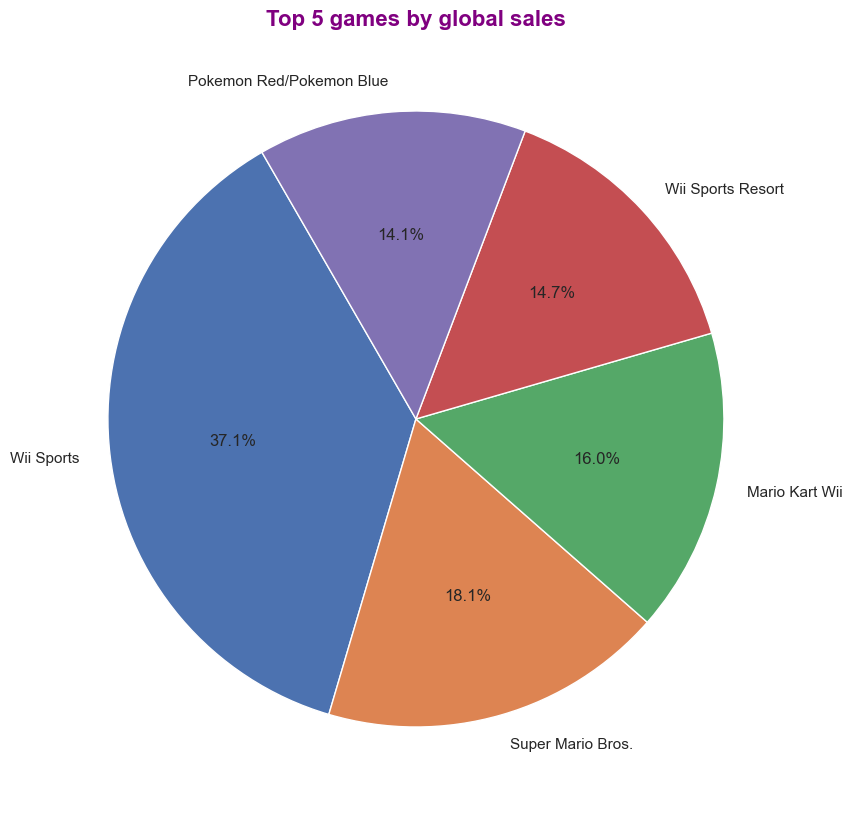

In [15]:
pie_sales_genre = df_sales.groupby("Name")["Global_Sales"].sum().sort_values(ascending=False)
pie_sales_genre.plot(kind='pie', figsize= (10,10), autopct='%1.1f%%',startangle=120);
plt.ylabel("");
plt.title("Top 5 games by global sales",fontweight="bold",fontsize = 16, color="purple");

---

### Correlation analysis between the North American Sales and Japanese Sales for the years 2010-2014  

##### Feature engineering

As missing values in the *release year* feature are equal to 269 observations (which is about 1.6%), missing values could be either avoided as the current version of *Seaborn* would handle them by showing only existing values. It could also be removed or filled using appropriate statistical methods to avoid data shifting.

In the current example, *linear interpolation* has been used due to minimal impact on the data.
Another step was data filtering based on the release year feature using *between* method. 
The main business question focuses on North American and Japanese sales; the new data frame has been limited to those two features by using the *loc* method and *corr()* to achieve a correlation coefficient.
 

In [16]:
df["Year_of_Release"].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983., 2020., 2017.])

In [17]:
df["Year_of_Release"].value_counts()

2008.0    1427
2009.0    1426
2010.0    1255
2007.0    1197
2011.0    1136
2006.0    1006
2005.0     939
2002.0     829
2003.0     775
2004.0     762
2012.0     653
2015.0     606
2014.0     581
2013.0     544
2016.0     502
2001.0     482
1998.0     379
2000.0     350
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      62
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1990.0      16
1987.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       9
2017.0       3
2020.0       1
Name: Year_of_Release, dtype: int64

##### Release year data distribution overview

The histograms below provides data distribution overview before and after handling of missing values.

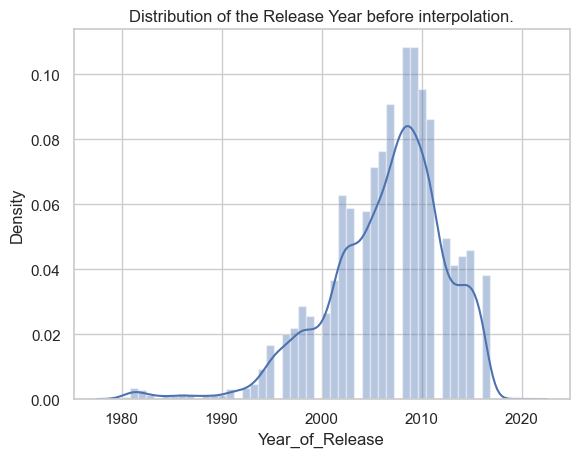

In [18]:
sns.distplot(df["Year_of_Release"], kde=True);
plt.title("Distribution of the Release Year before interpolation.");

In [19]:
year_inter = df["Year_of_Release"].interpolate(method='linear')

In [20]:
df["Year_of_Release"].isnull().sum()

269

In [21]:
year_inter.isnull().sum()

0

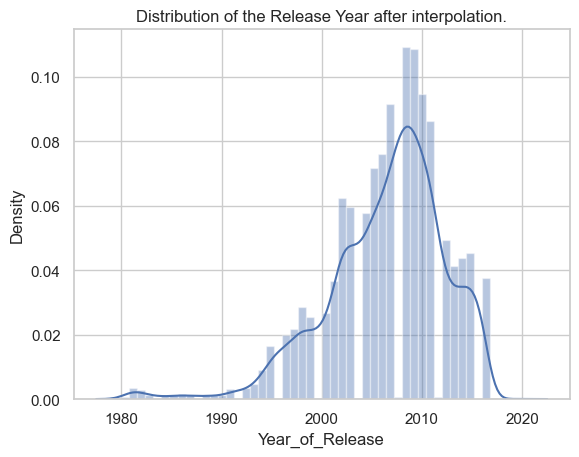

In [22]:
sns.distplot(year_inter, kde=True);
plt.title("Distribution of the Release Year after interpolation.");

##### Statistical comparison before/after interpolation

In [23]:
df["Year_of_Release"].describe()

count    16450.000000
mean      2006.487356
std          5.878995
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2020.000000
Name: Year_of_Release, dtype: float64

In [24]:
year_inter.describe()

count    16719.000000
mean      2006.486124
std          5.860053
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2020.000000
Name: Year_of_Release, dtype: float64

In [25]:
# removing null values by using linear interpolation - instead of droping NaN's

df["Year_of_Release"] = df["Year_of_Release"].interpolate(method='linear')
df["Year_of_Release"] = df["Year_of_Release"].astype(int)

In [26]:
# filter years between 2010 - 2014

In [27]:
years_2010_2014 = df[df["Year_of_Release"].between(2010,2014)]
years_2010_2014

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
14,Kinect Adventures!,X360,2010,Misc,Microsoft Game Studios,15.00,4.89,0.24,1.69,21.81,61.0,45.0,6.3,106.0,Good Science Studio,E
16,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,7.02,9.09,0.98,3.96,21.04,97.0,50.0,8.2,3994.0,Rockstar North,M
23,Grand Theft Auto V,X360,2013,Action,Take-Two Interactive,9.66,5.14,0.06,1.41,16.27,97.0,58.0,8.1,3711.0,Rockstar North,M
27,Pokemon Black/Pokemon White,DS,2010,Role-Playing,Nintendo,5.51,3.17,5.65,0.80,15.14,NaN,NaN,NaN,NaN,NaN,NaN
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,Activision,9.04,4.24,0.13,1.32,14.73,88.0,81.0,3.4,8713.0,"Infinity Ward, Sledgehammer Games",M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16692,Outdoors Unleashed: Africa 3D,3DS,2011,Sports,Mastiff,0.01,0.00,0.00,0.00,0.01,NaN,NaN,tbd,NaN,Mastiff,T
16696,Metal Gear Solid V: Ground Zeroes,PC,2014,Action,Konami Digital Entertainment,0.00,0.01,0.00,0.00,0.01,80.0,20.0,7.6,412.0,Kojima Productions,M
16700,Breach,PC,2011,Shooter,Destineer,0.01,0.00,0.00,0.00,0.01,61.0,12.0,5.8,43.0,Atomic Games,T
16706,STORM: Frontline Nation,PC,2011,Strategy,Unknown,0.00,0.01,0.00,0.00,0.01,60.0,12.0,7.2,13.0,SimBin,E10+


In [28]:
# correlation

years_2010_2014.loc[:,["NA_Sales","JP_Sales"]].corr()

,NA_Sales,JP_Sales
NA_Sales,1.000000,0.259355
JP_Sales,0.259355,1.000000


In [29]:
years_2010_2014_corr = years_2010_2014.loc[:,["NA_Sales","JP_Sales"]].corr()

##### Correlation coefficent heatmap

##### Insights

To provide a clear overview of the correlation coefficient values, the heat map has been used, which is a common visualization that shows relationships between two values. It can be seen that there is a weak positive  (*0.26*) between Japanese and North American sales.

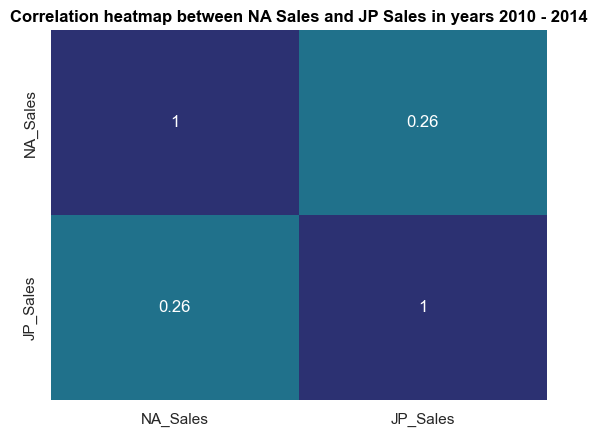

In [30]:
sns.heatmap(years_2010_2014_corr,vmin=-1, vmax=1, annot=True, cmap="crest", cbar=False);

plt.title("Correlation heatmap between NA Sales and JP Sales in years 2010 - 2014", loc="center",
          color="#000000", fontweight="bold");

##### Correlation plot

##### Insights
In addition to heatmap above, *relationship / scatter plot* has been created, which provides an in-depth overview in terms of the relationship between *North American* and *Japanese* sales data points. 

It can be seen that the vast majority of data points are stacked between 0 – 4 of the *North American* sales against 0-1 *Japanese* Sales between the years **2010 – 2014**, giving a graphical explanation in terms of a weak correlation coefficient. Additionally a regression line has been added that provides an overview of the regression and its limits.


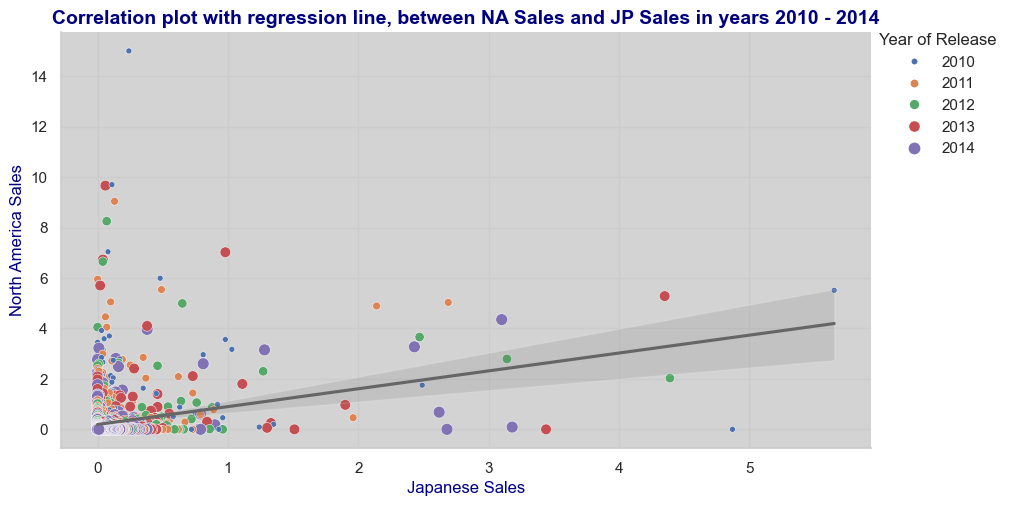

In [31]:
sns.set_style(rc = {"axes.facecolor": "lightgray"}); # with light grey bcakground the regression line is more visible

ax = sns.relplot(data=years_2010_2014, x="JP_Sales", y="NA_Sales", hue="Year_of_Release",size="Year_of_Release",
                 aspect=1.8, palette="deep");

sns.move_legend(ax, "upper right", bbox_to_anchor=(0.99, 0.99), title="Year of Release")
sns.regplot(data=years_2010_2014, x="JP_Sales", y="NA_Sales", scatter=False, truncate=True , color=".4");
# turncate - regression line data limits, scatter false to not overide relplot

plt.title("Correlation plot with regression line, between NA Sales and JP Sales in years 2010 - 2014", 
          loc="center",fontweight="bold", fontsize = 14, color="#000080");
plt.xlabel("Japanese Sales",color="#000080");
plt.ylabel("North America Sales", color="#000080");

### Distribution of the most popular 4 game genres 


In order to obtain insights about the most popular game genres, each genre has been counted by using *value_counts* method. To be able to visualize genre-counted data, it has been transformed into a data frame, including index transformation of the feature.

In [32]:
df["Genre"].value_counts()

Action          3370
Sports          2348
Misc            1750
Role-Playing    1500
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       874
Fighting         849
Strategy         683
Puzzle           580
Name: Genre, dtype: int64

In [33]:
df_genre_dist = pd.DataFrame(df["Genre"].value_counts().reset_index())
df_genre_dist

,index,Genre
0,Action,3370
1,Sports,2348
2,Misc,1750
3,Role-Playing,1500
4,Shooter,1323
5,Adventure,1303
6,Racing,1249
7,Platform,888
8,Simulation,874
9,Fighting,849


In [34]:
df_genre_platform = df[df["Genre"].isin(["Sports", "Role-Playing", "Misc", "Action"])]
df_genre_platform.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
7,Wii Play,Wii,2006,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
12,Pokemon Gold/Pokemon Silver,GB,1999,Role-Playing,Nintendo,9.00,6.18,7.20,0.71,23.10,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
df_genre_platform.isnull().sum()

Name                  0
Platform              0
Year_of_Release       0
Genre                 0
Publisher            37
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       4624
Critic_Count       4624
User_Score         3585
User_Count         4853
Developer          3542
Rating             3612
dtype: int64

##### Categorical plot distribution overview 

One of the most common techniques used to visualise distributions is *histogram*. In the example below, the histogram provides a clear overview of each genre's distribution.

##### Insights


**<center>Four the most popular genres based on their total count are as follows:</center>** 


|Genre|Count|
|-----|------|
|Action| 3370|
|Sports| 2348|
|Misc|1750|
|Role-Playing|1500|


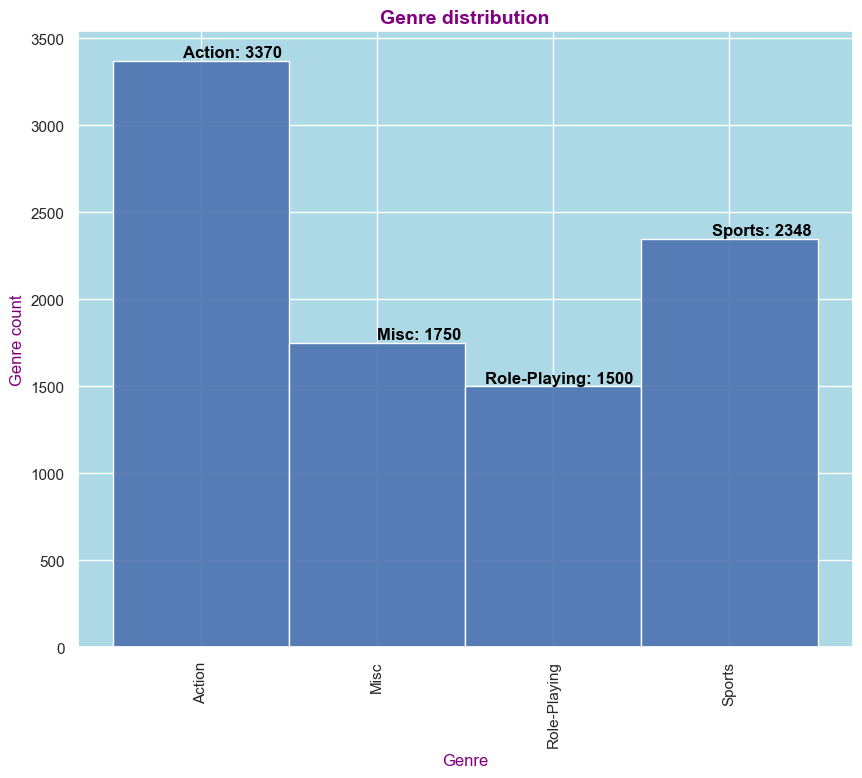

In [36]:
sns.set_style("darkgrid");
plt.figure(figsize=(10,8))
sns.set_style(rc = {"axes.facecolor": "lightblue"});

sns.histplot(data=df_genre_platform["Genre"].sort_values(), palette="blue", alpha=0.9)

plt.xticks(rotation=90);
plt.xlabel("Genre",color="purple");
plt.ylabel("Genre count",color="purple");
plt.title("Genre distribution",fontweight="bold", color="purple", fontsize = 14);


plt.text(-0.1,3390, "Action: 3370", color="black", fontweight="bold");
plt.text(2.9,2368, "Sports: 2348", color="black", fontweight="bold");
plt.text(1,1770, "Misc: 1750", color="black", fontweight="bold");
plt.text(1.61,1520, "Role-Playing: 1500", color="black", fontweight="bold");

##### Distribution boxplot with stripplot

In addition to the histogram above, to obtain an in-depth overview of the genre distribution, a box plot has been created, which provides overview of genre distributions shifts among different gaming platforms as addition to the *strip plot* which provides a distribution of the datapoints.

The boxes provide valuable insights about genre distribution per platform based on their quartiles, in which the box represents 50% of the middle dataset (interquartile)  of the genres per platform and two whiskers where each representing 25% of the data distribution including minimal (smallest) and maximum (highest) values. Strip plot provides distribution of the genre data points across different gaming platforms. 


##### Insights

Stripplot (red dots) represents game genre per relevant platform including popularity of the genre per platform (dot density representing higher popularity).

- For the Action genre 50% of the games were made for the platforms: **PS3, PS2, DS, GBA, 3DS, PS4, PS, PSP, N64** , and five of the most popular Action games were on the platforms: **Wii, X360, PS3, PS2, DS.** 

- For the Sports genre 50% of the games were made for the platforms: **PS3, PS2, DS, GBA, 3DS, PS4, PS, PSP**, and five of the most populat sports genre games were on the platforms: **Wii, PS2, PS, X360, XB**

- For the Misc genre 50% of the games were made for the platforms: **PS3, PS2, DS, GBA, 3DS**, and three of the most populat Misc genre games were on the platforms: **Wii, PS2, DS**.

- For the Role-Playing genre 50% of the games were made for the platforms: **PS2, DS, GBA, 3DS, PS4, PS, PSP** , and three of the most popular Role-Playing games were on the platforms: **PS2, DS, PSP** .

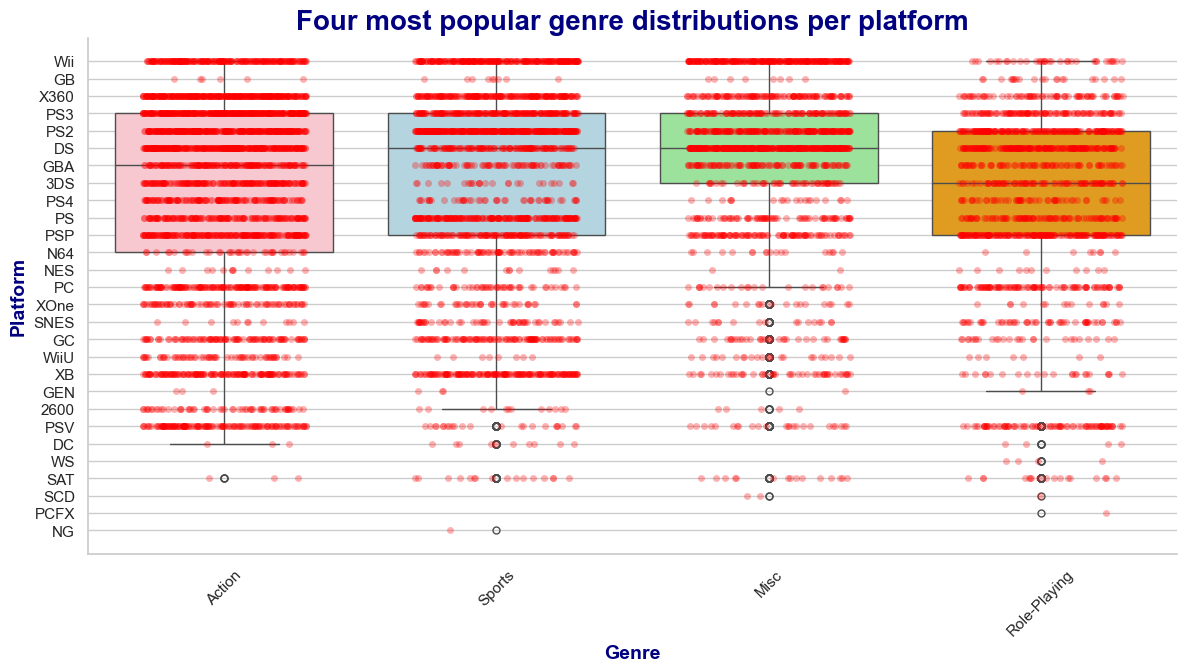

In [37]:
sns.set_style(rc = {"axes.facecolor": "white"})
sns.set_style("whitegrid");

sns.catplot(data=df_genre_platform,y="Platform", x="Genre", kind="box",height=6,aspect=2, 
            order=["Action","Sports","Misc", "Role-Playing"] ,palette=["pink","lightblue","lightgreen","orange"],
           legend=False);

sns.stripplot(x='Genre', y='Platform',data=df_genre_platform,alpha=0.3,jitter=0.3,color="red");

plt.xticks(rotation=45);
plt.title("Four most popular genre distributions per platform", fontsize = 20, fontweight="bold", color="#000080")
plt.xlabel("Genre",fontweight="bold", fontsize = 14, color="#000080");
plt.ylabel("Platform",fontweight="bold", fontsize = 14, color="#000080");

### 3 most common “developer” in the dataset 

##### Data preparation
In order to generate visualisation and obtain the three most common developers, it is important to highlight that the *developer* feature has 39.6% missing values, therefore the outcome is based on the remaining 60.4% of data (which could be treated as a sample). 

The current Seaborn library shows only the outcome of the data where NaN values are not present; therefore, removing them is not necessary. 

Filling *NaNs* with new categories or using the most common would significantly change true data distribution. In addition to achieving the most common developers, each of the developers has been counted by using *value_counts* method, followed by filtering developers count higher than 100.

In [38]:
df["Developer"].isnull().value_counts()

False    10096
True      6623
Name: Developer, dtype: int64

In [39]:
df["Developer"].isnull().value_counts(normalize=True)

False    0.603864
True     0.396136
Name: Developer, dtype: float64

In [40]:
df["Developer"].value_counts()

Ubisoft                                   204
EA Sports                                 172
EA Canada                                 167
Konami                                    162
Capcom                                    139
                                         ... 
Genki, Kojima Productions                   1
Warner Bros. Interactive Entertainment      1
THQ, Altron                                 1
Netherock Ltd.                              1
Interchannel-Holon                          1
Name: Developer, Length: 1696, dtype: int64

In [41]:
df["Developer"].unique()

array(['Nintendo', nan, 'Good Science Studio', ..., 'Big Red Software',
       'Atomic Games', 'Interchannel-Holon'], dtype=object)

In [42]:
df["Developer"].nunique()

1696

In [43]:
df[df["Developer"].isnull()]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,NaN,NaN,NaN,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,NaN,NaN,NaN,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,Nintendo,9.05,10.95,1.93,2.74,24.67,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
# value_counts as default param has dropna=True
devs_count = df["Developer"].value_counts()

In [45]:
devs_count[devs_count >= 100]

Ubisoft             204
EA Sports           172
EA Canada           167
Konami              162
Capcom              139
EA Tiburon          108
Electronic Arts     104
Ubisoft Montreal    101
Name: Developer, dtype: int64

In [46]:
devs_count_100up = devs_count[devs_count >= 100]


In [47]:
devs_count

Ubisoft                                   204
EA Sports                                 172
EA Canada                                 167
Konami                                    162
Capcom                                    139
                                         ... 
Genki, Kojima Productions                   1
Warner Bros. Interactive Entertainment      1
THQ, Altron                                 1
Netherock Ltd.                              1
Interchannel-Holon                          1
Name: Developer, Length: 1696, dtype: int64

In [48]:
devs_count_100up

Ubisoft             204
EA Sports           172
EA Canada           167
Konami              162
Capcom              139
EA Tiburon          108
Electronic Arts     104
Ubisoft Montreal    101
Name: Developer, dtype: int64

##### Categorical bar chart

Another popular visualization used for displaying proportions (amounts) is the categorical point plot, which provides an overview of the most popular developers. 


##### Insights
Based on the  plot, which clearly shows the proportions of developers below, provides an overview of eight of the most common developers, where **three of the most common** are as follows: 

**<center>Three of the most popular, across 1696 unique developers are as follows:</center>** 


|Developer|Count|
|-----|------|
|Ubisoft| 204|
|EA Sports| 172|
|EA Canada|167|

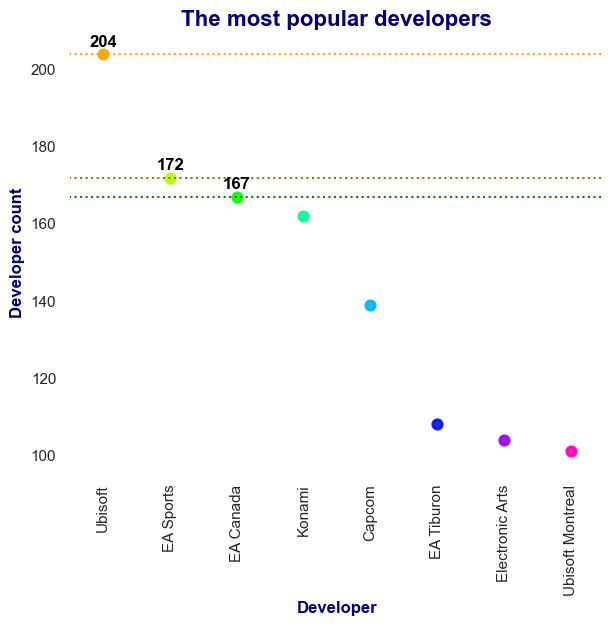

In [49]:
sns.set_style("darkgrid");
sns.set_style(rc = {"axes.facecolor": "white"});

sns.catplot(data=devs_count_100up, kind="point", legend=None,aspect=1.3, alpha=0.9, palette="hsv")
plt.xticks(rotation=90);

plt.title("The most popular developers",fontweight="bold", fontsize=16, color="#000080");
plt.ylabel("Developer count",fontweight="bold", color="#000080");
plt.xlabel("Developer",fontweight="bold", color="#000080");

plt.text(-0.2,206, "204", color="black",fontweight="bold");
plt.axhline(y=204, color="orange", linestyle=':');

plt.text(0.8,174, "172", color="black",fontweight="bold");
plt.axhline(y=172, color="#808000", linestyle=':');

plt.text(1.8,169, "167", color="black",fontweight="bold");
plt.axhline(y=167, color="green", linestyle=':');

##### Game developers distribution per gaming platform between 1995 - 2020

In addition to obtaining in-depth insights about three of the most popular game developers, the categorical strip plot below provides an overview of how developers competed with each other and the differences in their product distribution across various gaming platforms and release years.

##### Insights

- Out of the three most popular developers, **Ubisoft** and **EA Sports** did not make any games before the year 2000. 
- **EA Canada** developed its first game in 1998 on *PS* platform but did not release any game after the year 2014 in comparison to **Ubisoft** or **EA Sports**.
- The latest game released by the most popular developer: **Ubisoft**, was on the *DS* platform.
- **EA Sports** had games on fewer platforms between 2007 and 2009 in comparison with **Ubisoft** and **EA Canada**.


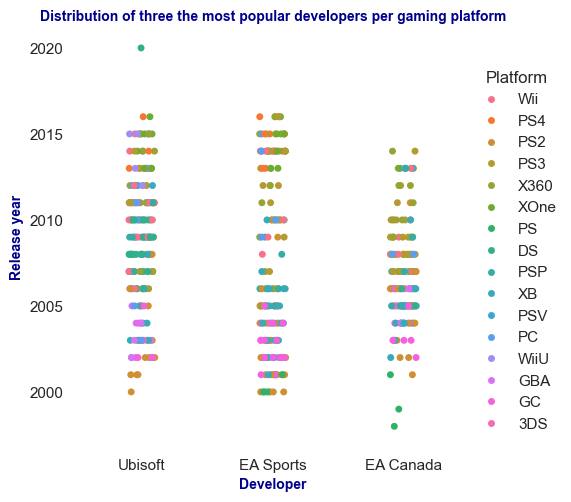

In [50]:
sns.set_style("darkgrid");
sns.set_style(rc = {"axes.facecolor": "white"});
popular_devs = df[df["Developer"].isin(["Ubisoft", "EA Sports", "EA Canada"])]

#---

sns.catplot(data=popular_devs, x="Developer", y="Year_of_Release", hue="Platform");

plt.title("Distribution of three the most popular developers per gaming platform",fontweight="bold", color="darkblue",fontsize=10);
plt.ylabel("Release year",fontweight="bold", color="darkblue",fontsize=10);
plt.xlabel("Developer",fontweight="bold", color="darkblue",fontsize=10);

### Mean comparison between older and newer games based on European Sales

In order to check if older games have a higher mean in terms of European sales than games released after the year 2005, the dataset has been filtered for game name, release year and European sales feature by using the *loc* method. Once data was filtered it was divided further to games up to 2005 and after the year 2005.

In [51]:
early_2005_games = df[df["Year_of_Release"] <= 2005]
early_2005_games

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,NaN,NaN,NaN,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,NaN,NaN,NaN,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,Nintendo,9.05,10.95,1.93,2.74,24.67,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16699,Planet Monsters,GBA,2001,Action,Titus,0.01,0.00,0.00,0.00,0.01,67.0,9.0,tbd,NaN,Planet Interactive,E
16701,Bust-A-Move 3000,GC,2003,Puzzle,Ubisoft,0.01,0.00,0.00,0.00,0.01,53.0,4.0,tbd,NaN,Taito Corporation,E
16710,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01,NaN,NaN,tbd,NaN,Atari,T
16712,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
early_2005_games_loc = early_2005_games.loc[:,["Name","Year_of_Release","EU_Sales"]]
early_2005_games_loc

,Name,Year_of_Release,EU_Sales
1,Super Mario Bros.,1985,3.58
4,Pokemon Red/Pokemon Blue,1996,8.89
5,Tetris,1989,2.26
9,Duck Hunt,1984,0.63
10,Nintendogs,2005,10.95
...,...,...,...
16699,Planet Monsters,2001,0.00
16701,Bust-A-Move 3000,2003,0.00
16710,Men in Black II: Alien Escape,2003,0.00
16712,Woody Woodpecker in Crazy Castle 5,2002,0.00


In [53]:
later_2005_games = df[df["Year_of_Release"] >= 2005]
later_2005_games

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
6,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16713,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16714,Samurai Warriors: Sanada Maru,PS3,2016,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
later_2005_games_loc = later_2005_games.loc[:,["Name","Year_of_Release","EU_Sales"]]
later_2005_games_loc

,Name,Year_of_Release,EU_Sales
0,Wii Sports,2006,28.96
2,Mario Kart Wii,2008,12.76
3,Wii Sports Resort,2009,10.93
6,New Super Mario Bros.,2006,9.14
7,Wii Play,2006,9.18
...,...,...,...
16713,SCORE International Baja 1000: The Official Game,2008,0.00
16714,Samurai Warriors: Sanada Maru,2016,0.00
16715,LMA Manager 2007,2006,0.01
16716,Haitaka no Psychedelica,2016,0.00


In [55]:
early_2005_games_loc.describe()

,Year_of_Release,EU_Sales
count,6212.000000,6212.000000
mean,2000.469897,0.147204
std,4.581317,0.427922
min,1980.000000,0.000000
25%,1998.000000,0.010000
50%,2002.000000,0.040000
75%,2004.000000,0.120000
max,2005.000000,10.950000


In [56]:
later_2005_games_loc.describe()

,Year_of_Release,EU_Sales
count,11466.000000,11466.000000
mean,2009.615821,0.142426
std,3.079818,0.548405
min,2005.000000,0.000000
25%,2007.000000,0.000000
50%,2009.000000,0.020000
75%,2012.000000,0.100000
max,2020.000000,28.960000


In [57]:
later_2005_games[later_2005_games["Year_of_Release"]>=2017]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
5936,Imagine: Makeup Artist,DS,2020,Simulation,Ubisoft,0.27,0.0,0.00,0.02,0.29,NaN,NaN,tbd,NaN,Ubisoft,E
14086,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017,Role-Playing,Sega,0.00,0.0,0.04,0.00,0.04,NaN,NaN,NaN,NaN,NaN,NaN
16222,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017,Role-Playing,Sega,0.00,0.0,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16385,Brothers Conflict: Precious Baby,PSV,2017,Action,Idea Factory,0.00,0.0,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


----

In [58]:
later_2005_games_loc[later_2005_games_loc["Year_of_Release"]==2017]

,Name,Year_of_Release,EU_Sales
14086,Phantasy Star Online 2 Episode 4: Deluxe Package,2017,0.0
16222,Phantasy Star Online 2 Episode 4: Deluxe Package,2017,0.0
16385,Brothers Conflict: Precious Baby,2017,0.0


##### EU mean sales per release year

Once a dataset has been divided, two separate bar plots (subplots) have been created, using a *mean estimator*, which provides the mean value of European sales per relevant year on the same chart. 

The chart has two separate colours of the games released before (<span style="color: blue;">blue</span>) and after (<span style="color: red;">red</span>) the year **2005**, providing a clear comparison of the sales averages.


##### Insights

- Most years where games were released before the year 2005 had higher average returns in comparison to newer games.
- The highest all-the-time sales mean of European sales was in the year 1990.
- Three the highest mean European sales were between 1988 – 1990.
- The highest mean European sales for games released after the year 2005 was in the year 2013. 
- No European sales were made between year 2017-2020.


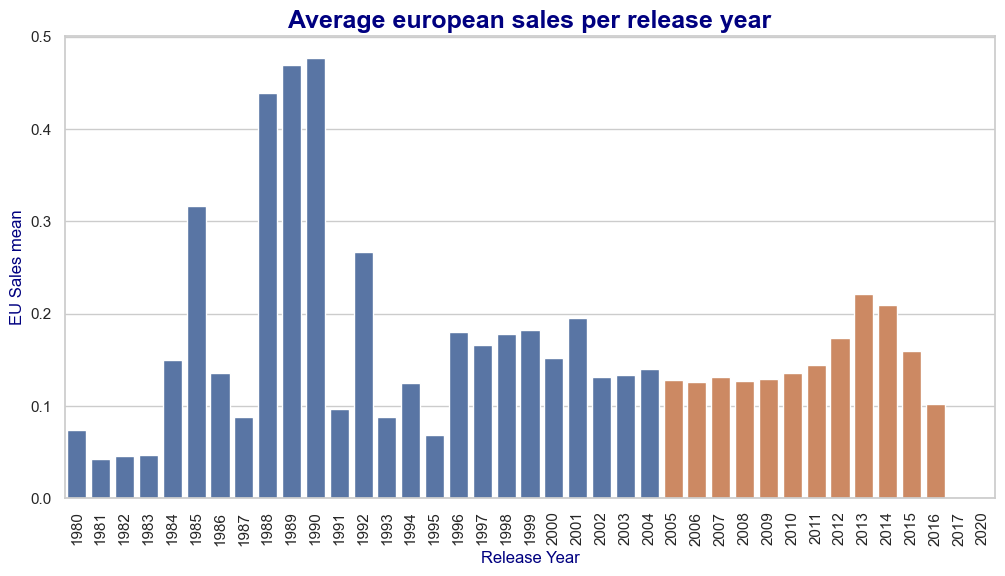

In [59]:
sns.set_style(rc = {"axes.facecolor": "white"});
sns.set_style("whitegrid");
ax1, ax2 = plt.subplots(nrows=1, ncols=1, figsize=(12,6))
plt.xticks(rotation=90);

plt.xlabel("Release Year", color="#000080")
plt.ylabel("EU Sales mean", color="#000080")
plt.title("Average european sales per release year", fontsize=18, fontweight="bold", color="#000080")

ax1 = sns.barplot(x="Year_of_Release", y="EU_Sales", data=early_2005_games_loc, estimator=mean, ci=None)
ax2 = sns.barplot(x="Year_of_Release", y="EU_Sales", data=later_2005_games_loc, estimator=mean, ci=None)

----

# Additional insights

#### Game release distribution / timeline

In order to analyse release year distribution, the feature has been grouped by the release year feature, including count aggregation to obtain the total number of sales per relevant year. Then, filtered data is divided into years before and after 2005, which will provide additional insights to the bar chart of average European sales in terms of total distribution and trend per relevant year.

In [60]:
release_years = df["Year_of_Release"].groupby(df["Year_of_Release"]).count()
release_years

Year_of_Release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      15
1986      21
1987      16
1988      15
1989      18
1990      16
1991      41
1992      44
1993      63
1994     122
1995     221
1996     265
1997     292
1998     382
1999     345
2000     357
2001     488
2002     843
2003     794
2004     773
2005     959
2006    1033
2007    1220
2008    1461
2009    1453
2010    1273
2011    1156
2012     660
2013     551
2014     586
2015     607
2016     503
2017       3
2020       1
Name: Year_of_Release, dtype: int64

In [61]:
release_years = pd.DataFrame(release_years)

In [62]:
release_years.rename(columns={'Year_of_Release': 'count'}, inplace=True)

In [63]:
release_years.reset_index(drop=False, inplace=True)

In [64]:
early_relase = release_years[release_years["Year_of_Release"]<=2005]

In [65]:
late_release = release_years[release_years["Year_of_Release"]>=2005]

In [66]:
early_relase.set_index("Year_of_Release", inplace=True)

In [67]:
late_release.set_index("Year_of_Release", inplace=True)

### European sales timeline

The line plot below provides an overview of the timeline development of the games globally:  before (<span style="color: blue;">blue</span>) and after (<span style="color: purple;">purple</span>) the year 2005, including an overview of the *sales count* per relevant year.

##### Insights

The first games were developed in **1980**, having relatively low and sideways trends up to the year **1990**. Since the year **1991**, a rising trend has been spotted. The highest development peak of the games was in the years **2008-2009**, and since then, that trend has been constantly falling.

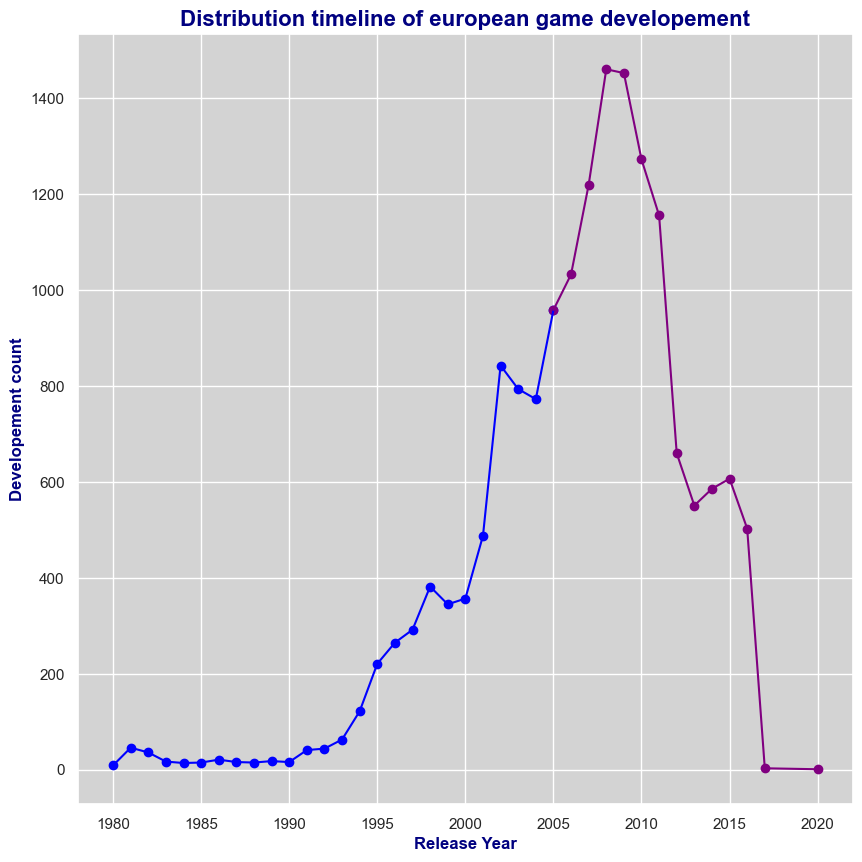

In [68]:
sns.set_style("darkgrid");
sns.set_style(rc = {"axes.facecolor": "lightgrey"});

ax1, ax2 = plt.subplots(nrows=1, ncols=1, figsize=(10,10))

ax1 = sns.lineplot(data=early_relase, palette=["blue"], legend=None);
ax2 = sns.lineplot(data=late_release, palette=["purple"], legend=None);

plt.xlabel("Release Year",fontweight="bold", color="#000080");
plt.ylabel("Developement count",fontweight="bold", color="#000080");
plt.title("Distribution timeline of european game developement",fontweight="bold", fontsize = 16, color="#000080");

plt.scatter(early_relase.index, y=early_relase["count"], color="blue");
plt.scatter(late_release.index, y=late_release["count"],color ="purple");

### Top five global sales platforms

Below is a grouped bar chart in a vertical orientation, providing an overview of the top five performers in terms of **global sales**, including sales among all other regions. 

Additionally, a table of contents has been created for easier identification of generated revenues made by relevant platforms per specific region, followed by horizontal bar plot of top selling games of the **PS2** which was the highest revenue performer across all other platforms.

##### Insights

- Five of the best sales performers in terms of global sales were: **PS2, X360, PS3, Wii and DS**.
- In terms of global sales, the highest performer was **PS2**.
- **PS2, X360, PS3 and Wii** platforms had the highest sales made in North America and lowest in Japan.
- In Japan, the lowest sales were performed by games on **X360** and the highest by **DS**.


In [69]:
sales_per_platform = df.loc[:, ["Platform", "NA_Sales", "EU_Sales","JP_Sales", "Other_Sales", "Global_Sales"]].groupby("Platform").sum().sort_values(by = "Global_Sales", ascending=False)


In [70]:
sales_per_platform_top5 = sales_per_platform.head(5)
sales_per_platform_top5

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Platform,,,,,
PS2,583.84,339.29,139.20,193.44,1255.64
X360,602.47,270.76,12.43,85.76,971.63
PS3,393.49,330.29,80.19,135.68,939.43
Wii,496.90,262.21,69.33,79.07,908.13
DS,382.67,188.89,175.57,59.28,807.10


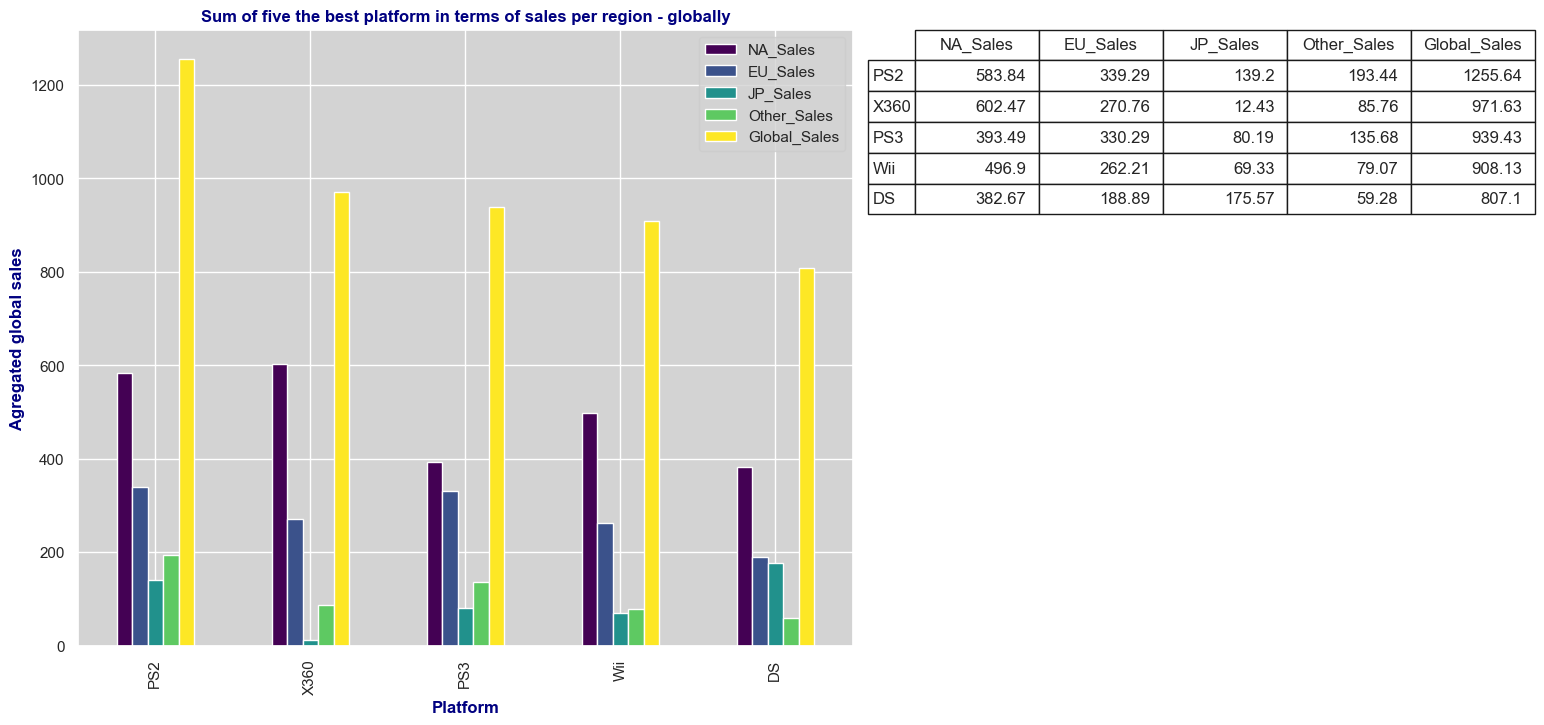

In [71]:
sns.set_style(rc = {"axes.facecolor": "lightgrey"});
sales_per_platform_top5.plot(kind="bar", figsize=(10,8), colormap="viridis");
sns.set_style("whitegrid");

plt.title("Sum of five the best platform in terms of sales per region - globally",fontweight="bold", color="#000080");
plt.ylabel("Agregated global sales",fontweight="bold", color="#000080");
plt.xlabel("Platform",fontweight="bold", color="#000080");

table = plt.table(cellText=sales_per_platform_top5.values,
                  rowLabels=sales_per_platform_top5.index,
                  colLabels=sales_per_platform_top5.columns,
                  bbox=(1.08, .7, 0.8, 0.3))

In [72]:
sales_platform_df = df.loc[:,["Name", "Platform", "Year_of_Release", "Genre", "Publisher","Global_Sales"]]

In [73]:
sales_platform_df_five = sales_platform_df[sales_platform_df["Platform"].isin(["PS2", "X360", "PS3", "Wii", "DS"])]

In [74]:
sales_platform_df_five_over20 = sales_platform_df_five[
    (sales_platform_df_five["Platform"] == "PS2") & (sales_platform_df_five["Global_Sales"] >= 10)]
sales_platform_df_five_over20

,Name,Platform,Year_of_Release,Genre,Publisher,Global_Sales
17,Grand Theft Auto: San Andreas,PS2,2004,Action,Take-Two Interactive,20.81
24,Grand Theft Auto: Vice City,PS2,2002,Action,Take-Two Interactive,16.15
28,Gran Turismo 3: A-Spec,PS2,2001,Racing,Sony Computer Entertainment,14.98
38,Grand Theft Auto III,PS2,2001,Action,Take-Two Interactive,13.10
48,Gran Turismo 4,PS2,2004,Racing,Sony Computer Entertainment,11.66


---

##### Five best selling games on PS2 - globally

Following the grouped chart above it is worth highlighting five of the best-selling games of the highest global performer – **PS2**

##### Insights

**<center>Five of the bestselling games globally for *PS2* platform including total value were as follows:</center>** 


|Game|Global sales|
|----|------------|
|Grand Theft Auto: San Andreas| 20.81|
|Grand Theft Auto: Vice City| 16.15|
|Gran Turismo 3: A-Spec| 14.98|
|Grand Theft Auto III| 13.10|
|Gran Turismo 4| 11.66|

<Figure size 640x480 with 0 Axes>

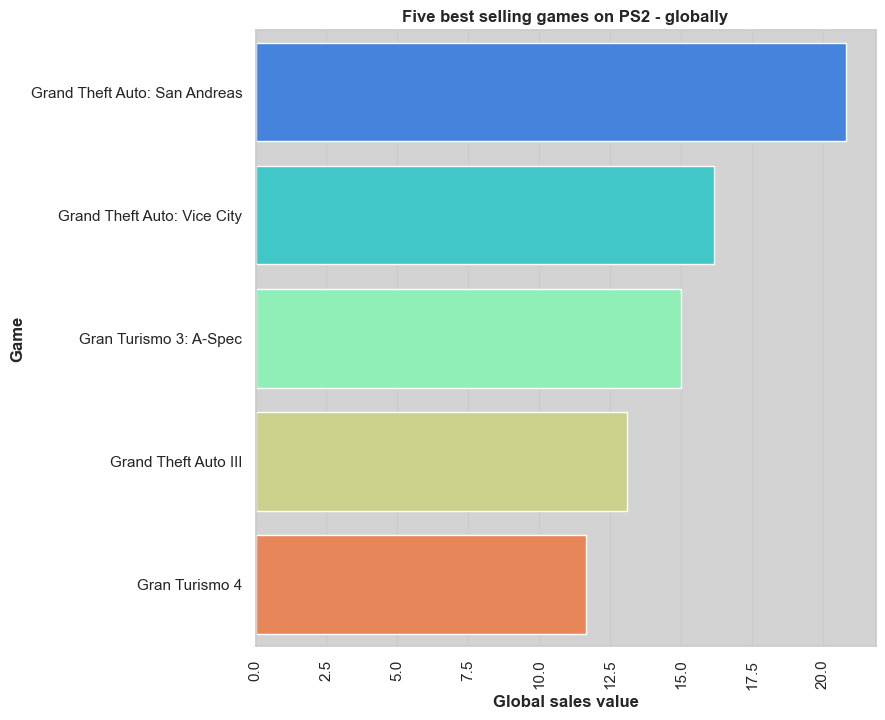

In [75]:
plt.subplots_adjust(left=0.2, right=0.8, top=0.9, bottom=0.1) 

plt.figure(figsize=(8,8))
sns.set_style(rc = {"axes.facecolor": "lightgrey"});
sns.barplot(data=sales_platform_df_five_over20, x="Global_Sales", y="Name", palette="rainbow")
plt.xticks(rotation=90);


plt.title("Five best selling games on PS2 - globally",fontweight="bold");
plt.ylabel("Game",fontweight="bold");
plt.xlabel("Global sales value",fontweight="bold");

---

##### References

Available at: https://www.analyticsvidhya.com/blog/2021/04/how-to-handle-missing-values-of-categorical-variables/
[Accessed 23 03 2024].

Madley-Dowd, P., 2019. The proportion of missing data should not be used to guide decisions on multiple imputation. [Online] 
Available at: https://www.sciencedirect.com/science/article/pii/S0895435618308710
[Accessed 23 03 2024].

McQuaid, D., 2024. What Visualization should I use - PowerPoint presentation. Dublin: CCT Dublin

Philips, K., 2023. The Color Blue — History, Meaning and Facts. [Online] 
Available at: https://www.hunterlab.com/blog/the-color-blue/
[Accessed 24 03 2024].

Yi, M., 2024. A complete guide to box plots. [Online] 
Available at: https://www.atlassian.com/data/charts/box-plot-complete-guide
[Accessed 24 03 2024].
